In [320]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [321]:
# Loading the dataset
df = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [322]:
df.shape

(4340, 8)

In [323]:
df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [324]:
final_df = df[['year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner']]

In [325]:
final_df['owner'].value_counts()

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

In [326]:
final_df.drop(final_df[final_df['owner']=='Test Drive Car'].index,axis=0,inplace=True)

In [327]:
final_df['No_of_previous_owner'] = final_df['owner'].map({'First Owner':1,'Second Owner':2,'Third Owner':3,"Fourth & Above":4})

In [328]:
final_df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,No_of_previous_owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,1.0
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,1.0
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,1.0
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,1.0
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2.0


In [329]:
final_df.drop(final_df[final_df['seller_type']=='Trustmark Dealer'].index,axis=0,inplace=True)

In [330]:
final_df['Current Year'] = 2020
final_df['No_of_Years'] = final_df['Current Year'] - final_df['year']
final_df.drop(['year','Current Year'],axis=1,inplace=True)

In [331]:
# percentage of missing values in each column
round(100*(final_df.isnull().sum()/len(final_df)),2).sort_values(ascending = False)

No_of_previous_owner    1.92
No_of_Years             0.00
owner                   0.00
transmission            0.00
seller_type             0.00
fuel                    0.00
km_driven               0.00
selling_price           0.00
dtype: float64

In [332]:
# percentage of missing values in each row
round(100*(final_df.isnull().sum(axis=1)/len(final_df)),2).sort_values(ascending = False)

1608    0.02
125     0.02
1040    0.02
236     0.02
2097    0.02
1830    0.02
75      0.02
3031    0.02
1298    0.02
1184    0.02
2904    0.02
340     0.02
986     0.02
3835    0.02
1053    0.02
1933    0.02
3992    0.02
1557    0.02
3830    0.02
3020    0.02
2831    0.02
1167    0.02
137     0.02
3982    0.02
3849    0.02
1791    0.02
1726    0.02
113     0.02
1215    0.02
666     0.02
        ... 
2917    0.00
2931    0.00
2930    0.00
2929    0.00
2928    0.00
2927    0.00
2926    0.00
2925    0.00
2923    0.00
2922    0.00
2921    0.00
2920    0.00
2919    0.00
2918    0.00
2916    0.00
2900    0.00
2915    0.00
2914    0.00
2913    0.00
2912    0.00
2911    0.00
2910    0.00
2909    0.00
2907    0.00
2906    0.00
2905    0.00
2903    0.00
2902    0.00
2901    0.00
0       0.00
Length: 4221, dtype: float64

In [333]:
final_df_dup=final_df.copy()
# Checking for duplicates and dropping the entire duplicate row if any
final_df_dup.drop_duplicates(subset=None, inplace=True)

In [334]:
final_df.shape

(4221, 8)

In [335]:
final_df_dup.shape

(3448, 8)

In [336]:
final_df=final_df_dup
final_df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,No_of_previous_owner,No_of_Years
0,60000,70000,Petrol,Individual,Manual,First Owner,1.0,13
1,135000,50000,Petrol,Individual,Manual,First Owner,1.0,13
2,600000,100000,Diesel,Individual,Manual,First Owner,1.0,8
3,250000,46000,Petrol,Individual,Manual,First Owner,1.0,3
4,450000,141000,Diesel,Individual,Manual,Second Owner,2.0,6


In [337]:
final_df = pd.get_dummies(final_df,drop_first=True)

In [338]:
final_df.head()

,selling_price,km_driven,No_of_previous_owner,No_of_Years,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Third Owner
0,60000,70000,1.0,13,0,0,0,1,1,1,0,0,0
1,135000,50000,1.0,13,0,0,0,1,1,1,0,0,0
2,600000,100000,1.0,8,1,0,0,0,1,1,0,0,0
3,250000,46000,1.0,3,0,0,0,1,1,1,0,0,0
4,450000,141000,2.0,6,1,0,0,0,1,1,0,1,0


In [339]:
# Seprating the dependent variable and target variable
y = final_df['selling_price']
X = final_df.drop('selling_price',axis=1)

In [340]:
# Splitting training and testing data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=5)

In [341]:
# Transforming the data
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [342]:
# Building a machine learning model using Random Forest Regressor
regressor = RandomForestRegressor()

# Hyperparameter optimization using Randomized Search CV

In [343]:
from sklearn.model_selection import RandomizedSearchCV

In [344]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [345]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


On each iteration, the algorithm will choose a difference combination of the features. Altogether, there are 2 * 12 * 2 * 3 * 3 * 10 = 4320 settings! However, the benefit of a random search is that we are not trying every combination, but selecting at random to sample a wide range of values.

In [346]:
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = 1)

In [347]:
final_df.isnull().sum()

selling_price                  0
km_driven                      0
No_of_previous_owner          75
No_of_Years                    0
fuel_Diesel                    0
fuel_Electric                  0
fuel_LPG                       0
fuel_Petrol                    0
seller_type_Individual         0
transmission_Manual            0
owner_Fourth & Above Owner     0
owner_Second Owner             0
owner_Third Owner              0
dtype: int64

In [348]:
# Training the data
X_train = X_train.fillna(X_train.mean())
y_train = y_train.fillna(y_train.mean())
X_test = X_test.fillna(X_test.mean())
y_test = y_test.fillna(y_test.mean)
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.4s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   0.9s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   0.4s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   0.4s
[CV] n_estimators=200, min_samples_split=15, m

[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.9s
[CV] n_estimators=200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   0.1s
[CV] n_estimators=200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   0.1s
[CV] n_estimators=200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   0.1s
[CV] n_estimators=200, min_samples_split=2, mi

[CV]  n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=25, total=   2.4s
[CV] n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=25 
[CV]  n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=25, total=   2.2s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=15 
[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=15, total=   0.3s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=15 
[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=15, total=   0.3s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=15 
[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=15, total=   0.3s
[CV] n_estimators=100, min_samples_sp

[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   1.1s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   1.0s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   0.6s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   0.6s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   0.6s
[CV] n_estimators=900, min_samples_split=10

[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=20, total=   0.4s
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=20 
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=20, total=   0.4s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   0.2s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   0.2s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   0.1s
[CV] n_estimators=400, min_samples_split=10, min_

[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=5, total=   0.8s
[CV] n_estimators=700, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=5 
[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=5, total=   1.0s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=25 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   0.2s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=25 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   0.2s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=25 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   0.2s
[CV] n_estimators=700, min_samples_split=5, min_samp

[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.3s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.3s
[CV] n_estimators=900, min_samples_split=5, mi

[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=20, total=   0.8s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=20, total=   0.9s
[CV] n_estimators=200, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=200, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   0.1s
[CV] n_estimators=200, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=200, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   0.1s
[CV] n_estimators=200, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=200, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   0.1s
[CV] n_estimators=1200, min_samples_split=1

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  4.4min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=2)

The most important arguments in RandomizedSearchCV are n_iter, which controls the number of different combinations to try, and cv which is the number of folds to use for cross validation (we use 100 and 3 respectively). More iterations will cover a wider search space and more cv folds reduces the chances of overfitting, but raising each will increase the run time. Machine learning is a field of trade-offs, and performance vs time is one of the most fundamental.

In [349]:
rf_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 5,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': 5}

In [350]:
y_pred = rf_random.predict(X_test)
errors = abs(y_pred - y_test)
mape = 100 * np.mean(errors / y_test)
accuracy = 100 - mape
print('Model Performance')
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:', mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test,y_pred)))
print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
print('Accuracy = {:0.2f}%.'.format(accuracy))
    

Model Performance
MAE: 163965.8337031138
MSE: 87373787470.7116
RMSE: 295590.57405592554
Average Error: 163965.8337 degrees.
Accuracy = 55.07%.


# Evaluate Random Search
To determine if random search yielded a better model, we compare the base model with the best random search model.

In [351]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('MAE:',mean_absolute_error(y_test,y_pred))
    print('MSE:', mean_squared_error(y_test,y_pred))
    print('RMSE:', np.sqrt(mean_squared_error(y_test,y_pred)))
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [352]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
MAE: 163965.8337031138
MSE: 87373787470.7116
RMSE: 295590.57405592554
Average Error: 187827.3634 degrees.
Accuracy = 48.96%.


In [353]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
MAE: 163965.8337031138
MSE: 87373787470.7116
RMSE: 295590.57405592554
Average Error: 163965.8337 degrees.
Accuracy = 55.07%.


In [354]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 12.47%.


# Hyperparameter Optimization with Grid Search Cross Validation
Random search allowed us to narrow down the range for each hyperparameter. Now that we know where to concentrate our search, we can explicitly specify every combination of settings to try. We do this with GridSearchCV, a method that, instead of sampling randomly from a distribution, evaluates all combinations we define.

In [355]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

This will try out 1 * 4 * 2 * 3 * 3 * 4 = 288 combinations of settings. We can fit the model, display the best hyperparameters, and evaluate performance:

In [356]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   38.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   51.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  2.5min finished


{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 8,
 'n_estimators': 100}

In [357]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
MAE: 163965.8337031138
MSE: 87373787470.7116
RMSE: 295590.57405592554
Average Error: 161547.5778 degrees.
Accuracy = 51.21%.


In [358]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of 4.58%.


# Plots

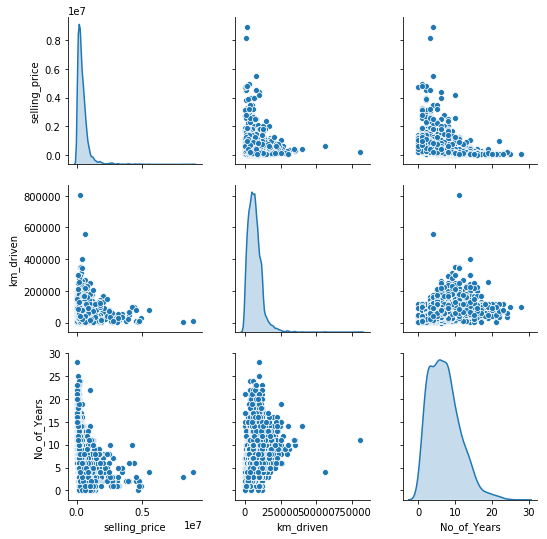

In [287]:
# Create a new dataframe of only numeric variables:

car_n=final_df[[ 'selling_price', 'km_driven', 'No_of_Years']]

sns.pairplot(car_n, diag_kind='kde')
plt.show()

# Correlation Matrix

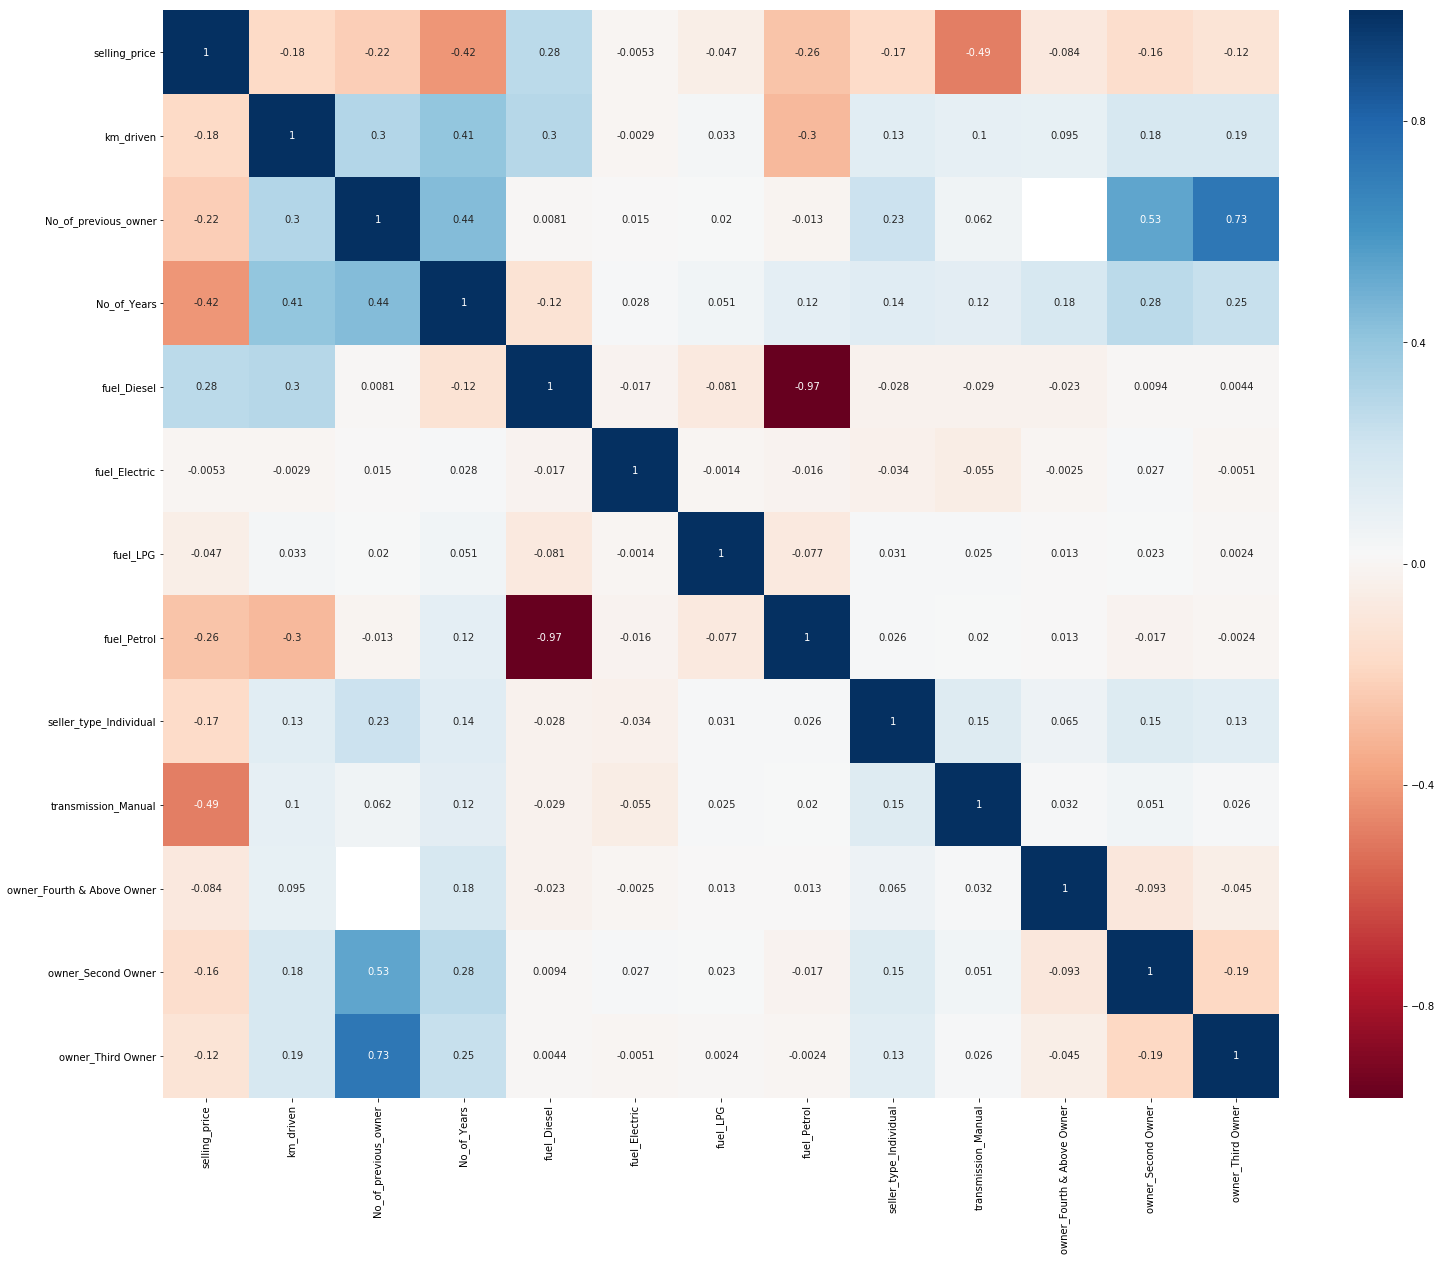

In [288]:
# Let's check the correlation coefficients to see which variables are highly correlated. Note:
# here we are considering only those variables (dataframe: car) that were chosen for analysis

plt.figure(figsize = (25,20))
sns.heatmap(final_df.corr(), annot = True, cmap="RdBu")
plt.show()